## 주가 데이터 불러오기
주식 데이터를 파이썬으로 불러와 이것 저것 하기 위해선 우선 주가 데이터를 불러와야 한다.
주가 데이터를 불러오자.

최근 시끄러운 삼바<sup>삼성바이오로직스</sup> 주가를 불러와 보자.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from fbprophet import Prophet

start = datetime(2016, 1, 1)
end = datetime(2018, 11, 16)

SB = web.DataReader('207940.KS','yahoo',start,end)
SB.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-10,148000,125500,135000,144000,7179018,144000
2016-11-11,186500,142000,149500,161500,8140539,161500
2016-11-14,177500,165000,165000,175500,2977177,175500
2016-11-15,181500,162500,179000,166000,2592949,166000
2016-11-16,173000,163500,168500,170000,1660976,170000


2016년 11월 10일 상장되었고, 시작가는 135,000원이었고 종가는 144,000원이었다. 장중 저가는 125,500원, 고가는 148,000원. 거래량은 7,179,018주였다. 

## 주가 그래프 그리기
종가를 기준으로 주식 가격 그래프를 그려보자.

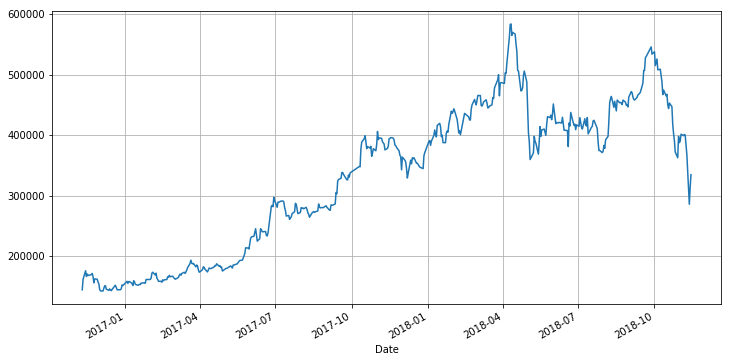

In [5]:
SB['Close'].plot(figsize=(12,6), grid=True);

그래프가 깔끔하게 그려졌다. 이제 지금까지의 주가를 통해 향후 가격을 모델링 해보자.

## 추가 설치 파일
#### DataReader 설치 
`SB = web.DataReader('207940.KS','yahoo',start,end)`
위 명령어를 실행시키기 위해 DataReader를 추가로 설치했습니다.
다음의 페이지를 참고했습니다. 
https://pypi.org/project/pandas-datareader/
터미널에 `$ pip install pandas-datareader` 명령어를 입력하여 설치했습니다.
#### pystan, prophet, fbprophet 설치
`from fbprophet import Prophet` 명령어를 실행하기 위해 설치했습니다.
터미널에 `pip install pystan`과 `pip install prophet`을 실행해 설치하였으나 계속 에러가 발생하였고, 여러 방법을 쓰다 실패해 아예 새로운 패키지를 설치해 해결했습니다. 
다음의 페이지를 참고했으며
https://anaconda.org/conda-forge/fbprophet
터미널에서 `conda install -c conda-forge fbprophet ` 명령어를 이용해 설치했습니다.

In [19]:
df = pd.DataFrame({'ds':SB.index, 'y':SB['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2016-11-10,144000
1,2016-11-11,161500
2,2016-11-14,175500
3,2016-11-15,166000
4,2016-11-16,170000


In [21]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [29]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
850,2019-11-10
851,2019-11-11
852,2019-11-12
853,2019-11-13
854,2019-11-14


In [30]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
850,2019-11-10,261701.201554,157277.207279,373190.886714
851,2019-11-11,263817.512659,164147.923443,370527.868763
852,2019-11-12,263130.237193,158723.830887,370590.401208
853,2019-11-13,262694.033528,156357.746458,367228.703289
854,2019-11-14,262699.098438,154547.849104,365948.346135


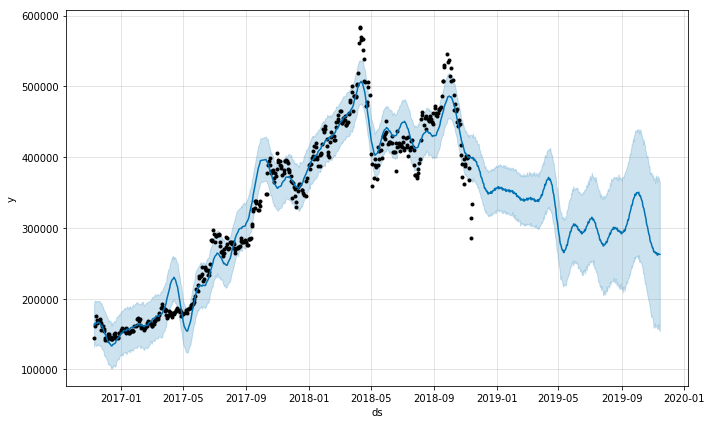

In [31]:
m.plot(forecast);

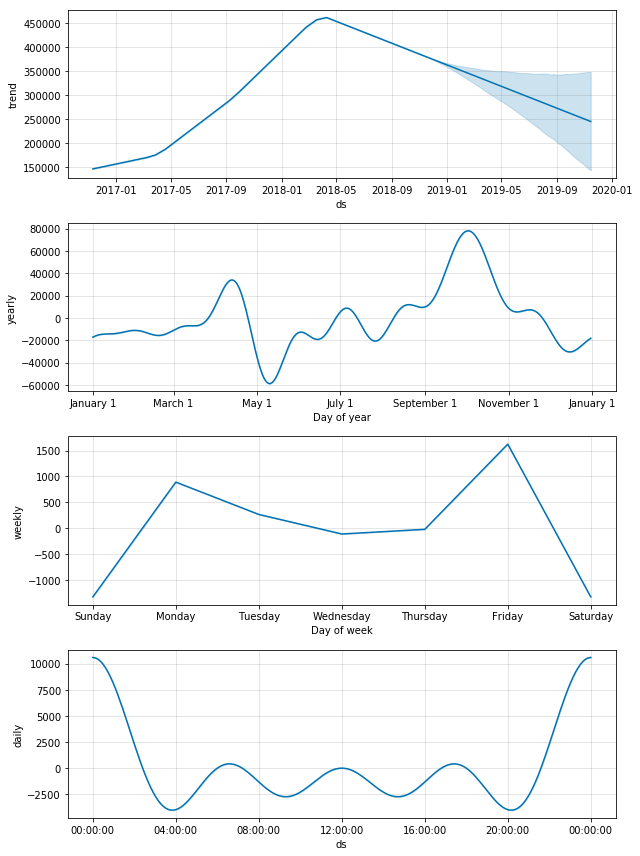

In [32]:
m.plot_components(forecast);